<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/08-Deep%20Learning/Linear_Regression_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/06/linear-regression-using-neural-networks/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-10,10,(observations,1))
generated_target=2*xs-3*zs+5+noise

In [ ]:
np.savez('TF_intro',input=generated_inputs,targets=generated_target)
training_data=np.load('TF_intro.npz')

In [ ]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 960us/step - loss: 79.9739
Epoch 2/100
32/32 [==============================] - 0s 967us/step - loss: 38.7075
Epoch 3/100
32/32 [==============================] - 0s 940us/step - loss: 41.3510
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 37.6805
Epoch 5/100
32/32 [==============================] - 0s 982us/step - loss: 39.0647
Epoch 6/100
32/32 [==============================] - 0s 963us/step - loss: 37.9016
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 39.9924
Epoch 8/100
32/32 [==============================] - 0s 923us/step - loss: 38.3282
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 38.5496
Epoch 10/100
32/32 [==============================] - 0s 927us/step - loss: 44.9952
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 41.1043
Epoch 12/100
32/32 [==============================] - 0s 937us/step - loss: 40.2964
Epoch 13/

In [ ]:
models.layers[0].get_weights()

[array([[ 1.7728912],
        [-3.1506658]], dtype=float32), array([4.99796], dtype=float32)]

In [ ]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]

In [ ]:
out=training_data['targets'].round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

0.028858629248893816

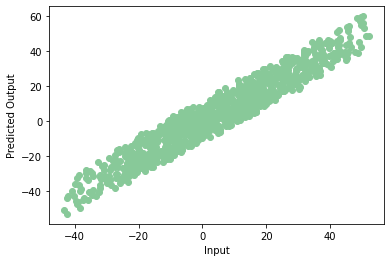

In [ ]:
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),np.squeeze(training_data['targets']),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()